# **Project Name**    -   book recommendation system



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

Book Recommendation System  

This is a book recommendation system that uses a user-based collaborative filtering method to recommend books to users. The system takes as input a user's past ratings of books, and then uses this information to recommend other books that the user is likely to enjoy.  The system works by first creating a matrix of similarity scores between all users. This matrix is created by comparing the ratings that each user has given to the same books. The higher the similarity score between two users, the more likely it is that they will enjoy the same books.  Once the similarity matrix has been created, the system can then recommend books to a user by finding other users who have similar tastes and then recommending books that those users have rated highly.  The system is implemented in Python using the Surprise library. The Surprise library provides a number of different algorithms for creating and using collaborative filtering recommender systems.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/kaushikk1999/Book-Recommendation-System.git

# **Problem Statement**


**Write Problem Statement Here.**


There are a large number of books available, and it can be difficult for users to find books that they will enjoy. A book recommendation system can help users find books that they are likely to like based on their past ratings of books, the ratings of other users, and the book's metadata

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px 
import numpy as np
import pandas as pd


C:\Users\yokau\AppData\Local\Temp\ipykernel_2260\2994134175.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### Dataset Loading

In [2]:
# Load Dataset

### Dataset First View

In [3]:
# Dataset First Look

# Imported Books.csv
Books = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\drive-download-20230724T130217Z-001\\Books.csv')

# Imported Users.csv
Users = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\drive-download-20230724T130217Z-001\\Users.csv')

# Imported Ratings.csv
Ratings = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\drive-download-20230724T130217Z-001\\Ratings.csv')

# combine Users and Books
combined_df = pd.merge(Ratings, Books, on='ISBN')

# combine combined_df and Ratings
df = combined_df.merge(Ratings, on=['User-ID', 'ISBN'], how='left')

C:\Users\yokau\AppData\Local\Temp\ipykernel_2260\2464484296.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\drive-download-20230724T130217Z-001\\Books.csv')


In [4]:
df

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_y
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,0
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,5
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,0
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,5
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,9
...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.LZZZZZZZ.jpg,0
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.LZZZZZZZ.jpg,7
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.LZZZZZZZ.jpg,0
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.LZZZZZZZ.jpg,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(1031136, 11)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating_x        1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031134 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
 10  Book-Rating_y        1031136 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 86.5+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating_x          0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
Book-Rating_y          0
dtype: int64

<Axes: >

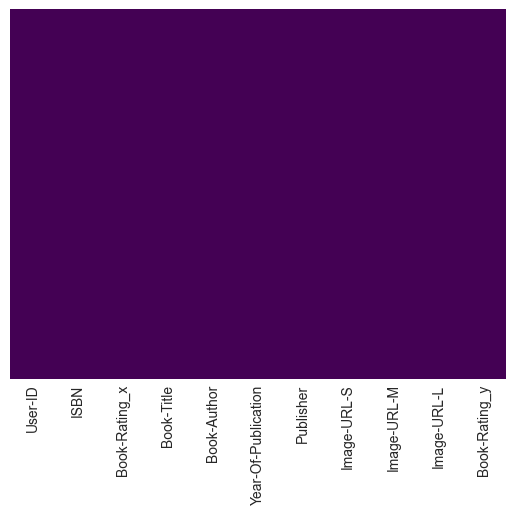

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

### What did you know about your dataset?

Answer Here

Book-Author            2

Publisher              2



Image-URL-L            4

very few values are only null

## ***2. Understanding Your Variables***

In [10]:
# Dataset Describe

df.describe(include='all')

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_y
count,1.031136e+06,1031136,1.031136e+06,1031136,1031134,1031136.0,1031134,1031136,1031136,1031132,1.031136e+06
unique,NaN,270151,NaN,241071,101587,202.0,16729,269842,269842,269839,NaN
top,NaN,0971880107,NaN,Wild Animus,Stephen King,2002.0,Ballantine Books,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg,NaN
freq,NaN,2502,NaN,2502,10053,87276.0,34724,2502,2502,2502,NaN
mean,1.405945e+05,NaN,2.839051e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.839051e+00
...,...,...,...,...,...,...,...,...,...,...,...
min,2.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,7.041500e+04,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,1.412100e+05,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,2.114260e+05,NaN,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+00


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print("--------")

# Assuming you have the DataFrame 'df' containing your dataset
display_unique_values(df)

Column: User-ID
Unique Values: [276725   2313   6543 ... 276618 276647 276660]
--------
Column: ISBN
Unique Values: ['034545104X' '0155061224' '0446520802' ... '0590907301' '0679752714'
 '0806917695']
--------
Column: Book-Rating_x
Unique Values: [ 0  5  9  8  6  7  4 10  3  2  1]
--------
Column: Book-Title
Unique Values: ['Flesh Tones: A Novel' 'Rites of Passage' 'The Notebook' ...
 'Triplet Trouble and the Class Trip (Triplet Trouble)'
 'A Desert of Pure Feeling (Vintage Contemporaries)'
 'Perplexing Lateral Thinking Puzzles: Scholastic Edition']
--------
Column: Book-Author
Unique Values: ['M. J. Rose' 'Judith Rae' 'Nicholas Sparks' ... 'Kitta Reeds'
 'Kurt Messick' 'Joseph Delissio']
--------
Column: Year-Of-Publication
Unique Values: [2002 '2001' 1996 '1999' 1998 2001 1994 1995 2003 1997 '1995' 1999 '1998'
 '2024' 1992 '1983' '2002' '1996' '2000' 0 '1989' '2003' '1991' 1993
 '1994' 1976 '1993' 1991 '0' 2000 1983 1990 1982 1988 1981 '1988' 1989
 1986 '1987' '1992' 1987 '1980' '199

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.


In [13]:
# Renamed columns Book-Rating
df.rename(columns={'Book-Rating_x': 'Book-Rating'}, inplace=True)


In [14]:
# Deleted columns Book-Rating_y
df.drop(['Book-Rating_y'], axis=1, inplace=True)


In [15]:
df = df.sort_values(by='Book-Title', ascending=False, na_position='last')
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
613470,53628,2842192508,0,Ã?Â?thique en toc,Didier Daeninckx,1998,Baleine,http://images.amazon.com/images/P/2842192508.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2842192508.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2842192508.01.LZZZZZZZ.jpg
613469,25436,2842192508,8,Ã?Â?thique en toc,Didier Daeninckx,1998,Baleine,http://images.amazon.com/images/P/2842192508.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2842192508.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2842192508.01.LZZZZZZZ.jpg
844233,90839,3442725739,8,Ã?Â?stlich der Berge.,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3442725739.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3442725739.01.LZZZZZZZ.jpg
844234,243548,3442725739,0,Ã?Â?stlich der Berge.,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3442725739.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3442725739.01.LZZZZZZZ.jpg
844235,261105,3442725739,0,Ã?Â?stlich der Berge.,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3442725739.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3442725739.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
954578,172742,0964147726,0,Always Have Popsicles,Rebecca Harvin,1994,Rebecca L. Harvin,http://images.amazon.com/images/P/0964147726.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0964147726.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0964147726.01.LZZZZZZZ.jpg
575116,18995,0590567330,0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.LZZZZZZZ.jpg
575117,35859,0590567330,0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.LZZZZZZZ.jpg
575118,55927,0590567330,0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.LZZZZZZZ.jpg


In [17]:
#delete unnecessary characters from authors, genres and description column
col_trans = ['Book-Title']
for col in col_trans:
    df[col].replace(r"[\[\]\-\\\/\"—'()|:.]Ã", "",regex=True, inplace=True) 
df['Book-Title'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]": "", "Ã":"A"}, regex=True, inplace=True)


In [19]:
#delete unnecessary characters from authors, genres and description column
col_trans = ['Book-Title']
for col in col_trans:
    df[col].replace(r"[\[\]\-\\\/\"—'()|:.]Ã", "A",regex=True, inplace=True) 
df['Book-Title'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]": "", "Ã":"A"}, regex=True, inplace=True)

In [ ]:
Ã?Â?

In [26]:
df = df.sort_values(by='Book-Title', ascending=False, na_position='last')
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
405839,8686,8479533382,7,Â¿QuiA©n se ha llevado mi queso,Spencer Johnson,1999,Ediciones Urano,http://images.amazon.com/images/P/8479533382.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8479533382.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8479533382.01.LZZZZZZZ.jpg
405840,219781,8479533382,8,Â¿QuiA©n se ha llevado mi queso,Spencer Johnson,1999,Ediciones Urano,http://images.amazon.com/images/P/8479533382.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8479533382.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8479533382.01.LZZZZZZZ.jpg
504287,11676,8495501104,0,Â¿QuA© me quieres amor,Manuel Rivas,2001,Santillana USA Publishing Company,http://images.amazon.com/images/P/8495501104.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8495501104.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8495501104.01.LZZZZZZZ.jpg
504293,199775,8495501104,8,Â¿QuA© me quieres amor,Manuel Rivas,2001,Santillana USA Publishing Company,http://images.amazon.com/images/P/8495501104.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8495501104.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8495501104.01.LZZZZZZZ.jpg
504294,246293,8495501104,0,Â¿QuA© me quieres amor,Manuel Rivas,2001,Santillana USA Publishing Company,http://images.amazon.com/images/P/8495501104.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8495501104.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8495501104.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
954578,172742,0964147726,0,Always Have Popsicles,Rebecca Harvin,1994,Rebecca L. Harvin,http://images.amazon.com/images/P/0964147726.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0964147726.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0964147726.01.LZZZZZZZ.jpg
575116,18995,0590567330,0,A Light in the Storm: The Civil War Diary of Amelia Martin Fenwick Island Delaware 1861 (Dear America),Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.LZZZZZZZ.jpg
575117,35859,0590567330,0,A Light in the Storm: The Civil War Diary of Amelia Martin Fenwick Island Delaware 1861 (Dear America),Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.LZZZZZZZ.jpg
575118,55927,0590567330,0,A Light in the Storm: The Civil War Diary of Amelia Martin Fenwick Island Delaware 1861 (Dear America),Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590567330.01.LZZZZZZZ.jpg


In [24]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with the 'Book_Title' column

# Replace all question marks (?) in the 'Book_Title' column with an empty string
df['Book-Title'] = df['Book-Title'].str.replace('?', '')

# Alternatively, you can use the following to replace all question marks in the entire DataFrame:
# df = df.replace('?', '', regex=True)

# Print the DataFrame to see the changes
#print(df)


### What all manipulations have you done and insights you found?

Answer Here.

Deleted columns Book-Rating_y
and
 Renamed columns Book-Rating

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

In [ ]:
import mitosheet
mitosheet.sheet(analysis_to_replay="id-xumxruymnt")

In [ ]:
from mitosheet.public.v3 import *; register_analysis("id-xumxruymnt");
# Sorted Book-Title in descending order
df = df.sort_values(by='Book-Title', ascending=False, na_position='last')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***